In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [161]:
train_data= pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [162]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [163]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [164]:
print (train_data.shape)
train_data.columns
print (train_data.info())
print (train_data['Sex'].value_counts(normalize= True))

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
male      0.647587
female    0.352413
Name: Sex, dtype: float64


In [165]:
print (train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [166]:
f_data= [train_data, test_data]
for data in f_data:
    data['Family']=0
    data['Family']= data['SibSp']+data['Parch']+1
print(train_data[['Family','Survived']].groupby(['Family'],as_index=False).mean())

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [167]:
for data in f_data:
    data['Embarked']= data['Embarked'].fillna('S')
print (train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [168]:
for data in f_data:
    data['Alone']=0
    data.loc[data['Family']==1,'Alone'] =1
print (train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())

   Alone  Survived
0      0  0.505650
1      1  0.303538


In [169]:
print (train_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().head(20))

   Cabin  Survived
0    A10       0.0
1    A14       0.0
2    A16       1.0
3    A19       0.0
4    A20       1.0
5    A23       1.0
6    A24       0.0
7    A26       1.0
8    A31       1.0
9    A32       0.0
10   A34       1.0
11   A36       0.0
12    A5       0.0
13    A6       1.0
14    A7       0.0
15  B101       1.0
16  B102       0.0
17   B18       1.0
18   B19       0.0
19   B20       1.0


In [170]:
convert= train_data.groupby(['Cabin']).Survived.mean().astype(int)
for data in f_data:
    data['Cabin']= data['Cabin'].map(convert)
    data['Cabin'].fillna('2',inplace=True)
print(train_data[['Cabin','Survived']])

    Cabin  Survived
0       2         0
1       1         1
2       2         1
3       0         1
4       2         0
..    ...       ...
886     2         0
887     1         1
888     2         0
889     1         1
890     2         0

[891 rows x 2 columns]


In [171]:
train_data['C_Fare']= pd.qcut(train_data['Fare'],4)
print (train_data[['C_Fare','Survived']].groupby(['C_Fare'],as_index=False).mean())

            C_Fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [172]:
for data in f_data:
    data['Sex']= data['Sex'].map({'female':0, 'male':1})
    data['Embarked']= data['Embarked'].map({'S':0,'C':1,'Q':2})
    data['Fare']= np.where(data['Fare']<=7.91,0,np.where((data['Fare']>7.91) & (data['Fare']<=14.454),1,np.where((data['Fare']>14.454) & (data['Fare']<31.0),2,3)))
print (train_data[['Fare','Survived']].groupby(['Fare'], as_index= False).mean())

   Fare  Survived
0     0  0.197309
1     1  0.308756
2     2  0.442478
3     3  0.582222


In [173]:
for data in f_data:
    data['Ini']= data['Name'].str.extract('(,.*?)\.')
    data['Ini']= data['Ini'].str[2:]
train_data['Ini'].head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Ini, dtype: object

In [174]:
for data in f_data:
    data['Ini'] = data['Ini'].replace('Mlle', 'Miss')
    data['Ini'] = data['Ini'].replace('Ms', 'Miss')
    data['Ini'] = data['Ini'].replace('Mme', 'Mrs')
print (train_data[['Ini','Survived']].groupby(['Ini'], as_index= False).mean())

             Ini  Survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3             Dr  0.428571
4       Jonkheer  0.000000
5           Lady  1.000000
6          Major  0.500000
7         Master  0.575000
8           Miss  0.702703
9             Mr  0.156673
10           Mrs  0.793651
11           Rev  0.000000
12           Sir  1.000000
13  the Countess  1.000000


In [175]:
for data in f_data:
    data['Ini']= np.where(data['Ini']=='Master',0,np.where(data['Ini']=='Miss',1,np.where(data['Ini']=='Mr',2,np.where(data['Ini']=='Mrs',3,4))))
print (train_data[['Ini','Survived']].groupby(['Ini'], as_index= False).mean())

   Ini  Survived
0    0  0.575000
1    1  0.702703
2    2  0.156673
3    3  0.793651
4    4  0.347826


In [176]:
for data in f_data:
    data['Age']= data['Age'].fillna(data.groupby('Ini')['Age'].transform('median')).astype(int)

In [177]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null int64
Cabin          418 non-null object
Embarked       418 non-null int64
Family         418 non-null int64
Alone          418 non-null int64
Ini            418 non-null int64
dtypes: int64(11), object(3)
memory usage: 45.8+ KB


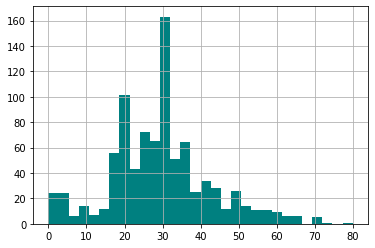

In [178]:
import matplotlib.pyplot as plt
p= train_data['Age'].hist(bins=30,color= 'teal')
p.set()
plt.show()

In [179]:
for data in f_data:
    data.loc[data['Age']<=16,'Age']=0
    data.loc[(data['Age']>16) & (data['Age']<=32), 'Age']=1
    data.loc[(data['Age']>32) & (data['Age']<=48), 'Age']=2
    data.loc[(data['Age']>48) & (data['Age']<=64), 'Age']=3
    data.loc[data['Age']>64,'Age']=4

In [180]:
train_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Family','C_Fare'],axis=1,inplace= True)
s= test_data.PassengerId
test_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Family'],axis=1,inplace= True)
train_data.head(4)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone,Ini
0,0,3,1,1,0,2,0,0,2
1,1,1,0,2,3,1,1,0,3
2,1,3,0,1,1,2,0,1,1
3,1,1,0,2,3,0,0,0,3


In [181]:
X= train_data.drop('Survived',axis=1)
y= train_data['Survived']

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=2)
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
predictions= logmodel.predict(X_test)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7757847533632287

In [185]:
from sklearn.neighbors import KNeighborsClassifier

kp = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
kp.fit(X_train,y_train)

#Predict Output
predicted= kp.predict(X_test) # 0:Overcast, 2:Mild

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.8475336322869955

In [186]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7713004484304933

In [187]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

accuracy_score(y_test,y_pred)

0.7533632286995515

In [188]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.672645739910314

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8475336322869955

In [192]:
y_pred= gb_clf.predict(test_data).astype(int)
pred= pd.DataFrame({'PassengerId':s, 'Survived': y_pred})
pred.to_csv('Titanic2_submission.csv', index= False)